# Final Submission Notebook

In this notebook, I am going to pull in all of the final data frames and the load my final model. I am also going to address my problem statement and provide recommendations and next steps. 

## Problem Statement

The first things that people look at when buying a house is the number of bedrooms and bathrooms, the overall square footage, and the price. The thing is there are so many other things factoring into how much the house will sell for. One day you may want to sell your house, and you want to get the most for it that you can. It's usually not feasable to build new rooms onto the house, but there are other things you can do besides a fresh coat of paint to increase your house's worth. After researching and modeling home prices in Ames, I will provide recommendations on what can be done to up the selling price. 

## The Best Model

Below I will be importing what I consider to be the best version of my models to predict the housing price. It also coincides with my best submission to Kaggle. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# final dataframes
df_train = pd.read_csv('../datasets/cleaned_data/clean_train_v6.csv', na_filter=False)
df_train.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Garage Finish_RFn,Garage Finish_Unf,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,0.0,13517,1,NA,1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,1,NA,1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,1,NA,0,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,1,NA,0,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,1,NA,1,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,1


In [3]:
df_test = pd.read_csv('../datasets/cleaned_data/clean_test_v1.csv', na_filter=False)
df_test.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,MS Zoning_C (all),Neighborhood_GrnHill,Neighborhood_Landmrk,Exterior 1st_CBlock,Exterior 1st_ImStucc,Exterior 1st_Stone,Exterior 2nd_Stone
0,2658,902301120,190,69.0,9142,1,Grvl,0,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,0
1,2718,905108090,90,0.0,9662,1,NA,1,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,0
2,2414,528218130,60,58.0,17104,1,NA,1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,60.0,8520,1,NA,0,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,0
4,625,535105100,20,0.0,9500,1,NA,1,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,0


In [4]:
final_feats = pd.read_csv('../datasets/ready_for_model/final_feat_v1.csv', na_filter=False)
final_feats.columns

Index(['Overall Qual', 'Overall Cond', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Misc Val',
       ...
       'Garage Finish_RFn', 'Garage Finish_Unf', 'Sale Type_CWD',
       'Sale Type_Con', 'Sale Type_ConLD', 'Sale Type_ConLI',
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=135)

Above is the final training dataset and the updated version of the test dataset, cleaned and dummied out. I also imported the final features dataframe. It is the first version of model 6 in the 02.3 notebook. I tried to address the outliers to fix the model, and while I did have some success with the under guesses, I ran out of time to make it work better. I will recreate the linear regression model from 02.3 below to show what my final training set scores were. 

In [5]:
X = df_train[final_feats.columns]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2010)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [6]:
linreg.score(X_train, y_train)

0.9351535499175746

In [7]:
linreg.score(X_test, y_test)

0.8985892048814729

In [8]:
cross_val_score(linreg, X_train, y_train).mean()

0.9129612997808796

I had some other models that performed better on the test score, but this model had the best balance of bias and variation in my opinion. Having between 89% and 94% of the variance explained by my model in the above tests is pretty good. This model also produced my best Kaggle submission score of 23,282.12783.

In [9]:
preds = linreg.predict(X_test)
residuals = y_test - preds

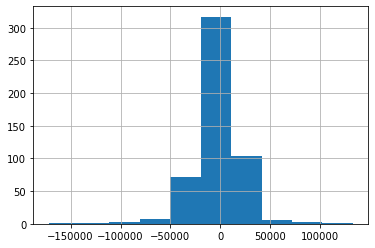

In [10]:
residuals.hist();

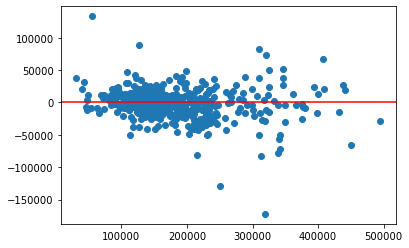

In [11]:
plt.scatter(preds, residuals)
plt.axhline(0, color='r');

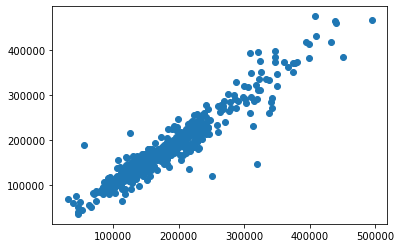

In [12]:
plt.scatter(preds, y_test);

When looking at predictions and the residuals, you can see that the scatter plot for the predictions vs residuals is becoming more homoskedastic, but still not quite there. The histogram helps confirm that by showing that there are a few outliers that make the spread a larger than I would like, though it is only a few. The last scatter plot shows that my model's predictions are almost completely linear too.

## Recommendations

Throughout the project, I was looking at the various features and how they related to the price of a house. Here are 5 changes that you can do that will up the worth of your home.

### 1. Garage Updates

First off, having a garage attached to your home is a huge plus. However, you could be leaving money on the table if you don't have it up to date and in good condition. Looking at the heatmap below, you can see that having and unfinished garage can be more detremental to your selling price than not having a garage at all! If you improve the quality to even just a 3 out of 5, an average rating, the possibilities open up. 

In [13]:
garage_fin = [ 'Garage Finish_NA', 'Garage Finish_RFn', 'Garage Finish_Unf', 'SalePrice']
gar_fin_corr = df_train[garage_fin].corr()

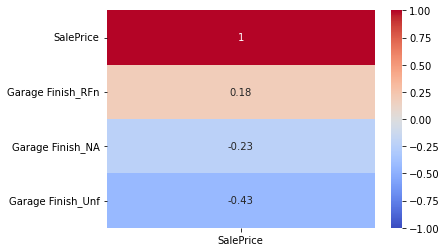

In [14]:
sns.heatmap(gar_fin_corr.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

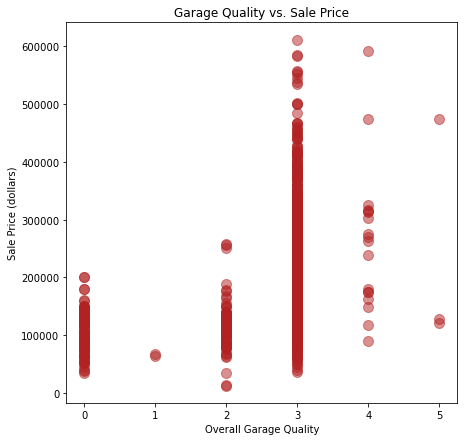

In [15]:
plt.figure(figsize=(7,7))
plt.title('Garage Quality vs. Sale Price')
plt.ylabel('Sale Price (dollars)')
plt.xlabel('Overall Garage Quality')
plt.scatter(df_train['Garage Qual'], df_train['SalePrice'], color='firebrick', alpha = .5, s=100)
plt.savefig('../images/garage.png');

### 2. Update the Kitchen

There's a reason kitchen updates are so common. Having a good quality kitchen will do you good when it comes to selling your house. Not only that, you can benefit from it to while you're living there. It's a win-win! You'll note that as the quality goes up, the lowest price also goes up. It's also hard to get below a 2 on quality, hence there are no 1s in this plot.

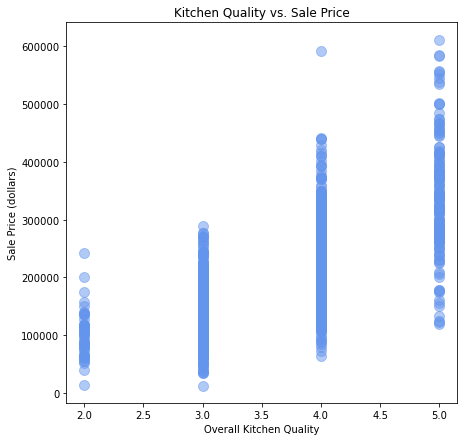

In [16]:
plt.figure(figsize=(7,7))
plt.title('Kitchen Quality vs. Sale Price')
plt.ylabel('Sale Price (dollars)')
plt.xlabel('Overall Kitchen Quality')
plt.scatter(df_train['Kitchen Qual'], df_train['SalePrice'], color='cornflowerblue', alpha=.5, s=100)
plt.savefig('../images/kitchen.png');

### 3. Add Some Masonry Veneer to Your Home

Did you know that not having any type of masonry veneer on your house is hurting your sale price? I sure didn't until I did this project. As you can see from the heatmap above, not having any has a rather strong negative correlation on sale price. You may want to do something more than common brick, but having even that is better than none.

In [17]:
masonry_veneer = ['Mas Vnr Type_BrkCmn', 'Mas Vnr Type_BrkFace', 'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'SalePrice']
mas_corr = df_train[masonry_veneer].corr()

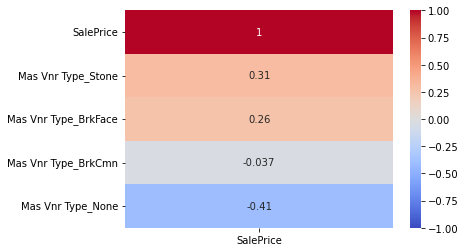

In [18]:
sns.heatmap(mas_corr.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

In [19]:
vnr_sale_df = pd.DataFrame(mas_corr['SalePrice']).drop('SalePrice') # make bar chart?

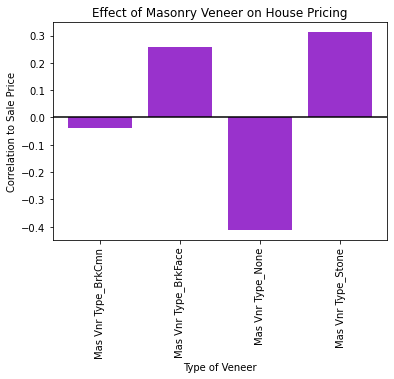

In [20]:
plt.title('Effect of Masonry Veneer on House Pricing')
plt.axhline(0,color='black')
plt.ylabel('Correlation to Sale Price')
plt.xlabel('Type of Veneer')
plt.xticks(rotation='vertical')
plt.bar(vnr_sale_df.index, vnr_sale_df['SalePrice'], color='darkorchid')
plt.savefig('../images/masonry.png');

### 4. Upgrade Your Heating System

It's not something most people think about until they have to. If you your heating system is outdated and doesn't work as well as it used to, upgrading it can increase your house's value. Not only that, it can make the winter months more bearable for you. It may also save you money on heating if you buy an energy efficient model. Food for thought.

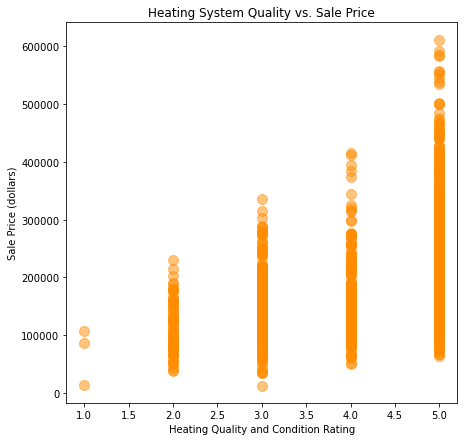

In [21]:
plt.figure(figsize=(7,7))
plt.title('Heating System Quality vs. Sale Price')
plt.ylabel('Sale Price (dollars)')
plt.xlabel('Heating Quality and Condition Rating')
plt.scatter(df_train['Heating QC'], df_train['SalePrice'], color='darkorange', alpha=.5, s=100)
plt.savefig('../images/heating.png');

### 5. If You Have a Basement, Up the Quality of It.

If you have a basement, it would do you good to make sure that it is updated with quality improvements and that the overall condition is good. The chart below multiplies condition and quality to show that having a higher number in both improves your range. Interestingly, if you have a basement but it is not scoring high in quality or condition rankings, your house may be taking a bigger hit than a home without a basement. If your basement isn't that tall, you can make up for it by making sure the condition is good, i.e. not damp or cracking.

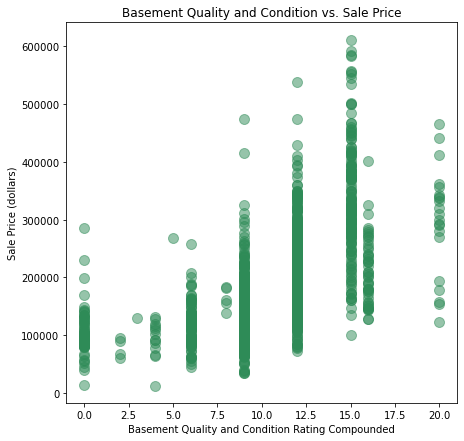

In [22]:
plt.figure(figsize=(7,7))
plt.title('Basement Quality and Condition vs. Sale Price')
plt.ylabel('Sale Price (dollars)')
plt.xlabel('Basement Quality and Condition Rating Compounded')
plt.scatter(df_train['bsmt_qual_cond'], df_train['SalePrice'], color='seagreen', s=100, alpha=.5)
plt.savefig('../images/basement.png');

# Final Thoughts and Next Steps

This project was an interesting one because the features didn't always interact like I thought they would. Things like pools and unique features didn't really effect the price of a house all that much. Having Masonry Veneer can apparently have a big effect on the housing price, which I didn't even know was a thing. I would have liked to make my model better by analyzing the outliers more, but I simply ran out of time. Given more time, I could further correct the model to make it more homoskedastic and have less variance. I don't think there needs to be more data added in either. With what was given to me, it was possible to make a pretty good model.